# Avaliação Intermediária

NOME: **COLOQUE SEU NOME AQUI**
E-MAIL: **COLOQUE SEU E-MAIL INSPER AQUI**

Esta é a A.I. de Álgebra Linear e Teoria da Informação de 1s2023.



INSTRUÇÕES:

1. Faça todas as questões
1. Salve o notebook
1. Envie o notebook salvo no Blackboard

IMPORTANTE:

* Você pode consultar qualquer material ou IA, mas não qualquer colega ou pessoa humana, presente ou não na prova.
* O envio da prova será fechado às 17h45. Aqueles que não enviarem o material até este horário ficarão com zero.
* A prova vale um total de 10 pontos. As questões 1, 2, 3 e 4 têm, respectivamente, pesos 1, 2, 3 e 4.
* Os conceitos F, E, D, C, B, A serão mapeados para 0, 2, 4, 6, 8 e 10.
* Para todas as questões, usaremos a rubrica que segue anexa a esta prova. Há uma rubrica para a justificativa e uma rubrica para o código. A nota da questão é a menor entre as notas da justificativa e do código.


## Exercício 1

* Peso: 1 ponto

Dadas as matrizes:

$$
A = \begin{bmatrix} 1 & 3 &\\ 2 & 1 \end{bmatrix} \\

B = \begin{bmatrix} 2 & 3\\ 5 & 8 \end{bmatrix} \\

C = AB \\

D = BA 
$$

calcule:

$X = (ABC^{-1}BAD^{-1})^T \odot A$



In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[1, 2], [2, 1]])
B = np.array([[2, 3], [5, 8]])
C = A @ B
D = B @ A

# X = (A @ B @ C^-1 @ B @ A @ D^-1) * A )
X = (A @ B @ np.linalg.inv(C) @ B @ A @ np.linalg.inv(D)) * A
print(X)

[[1.00000000e+00 2.07241631e-15]
 [5.32907052e-14 1.00000000e+00]]


### Justificativa

Simplesmente realizei a conta do X, que esta no enunciado

# Exercício 2

* Peso: 2 pontos

Tenho uma matriz $X$ que contém todas as posições $(i,j)$ de pixels de uma figura de 600x600 pixels, sendo cada pixel armazenado em uma coluna e cada dimensão armazenada em uma linha. Qual é a matriz que permite encolher essa figura de forma que cada uma de suas dimensões seja reduzida pela metade, mas seu centro seja preservado? Se precisar, use coordenadas homogêneas!


### Justificativa

A matriz na qual o enunciado pede eh:
$$
T = 
\begin{bmatrix}
    0.5 & 0 & \Delta x \\
    0 & 0.5 & \Delta x \\
    0 & 0 & 1
\end{bmatrix}
$$
Onde nosso $\Delta x$ e $\Delta y$ São iguais a zero, portanto a nossa matriz nâo translada para nenhum lugar, ou seja, mantem seu centro perservado

Nessa matriz multiplicamos nosso eixo y e eixo x por $0.5$, sendo assim, diminuimos o espaço que os pixels ocupam pela metade

Abaixo foi feita uma demonstração de como se aplicaria isso em uma nuvem de pontos


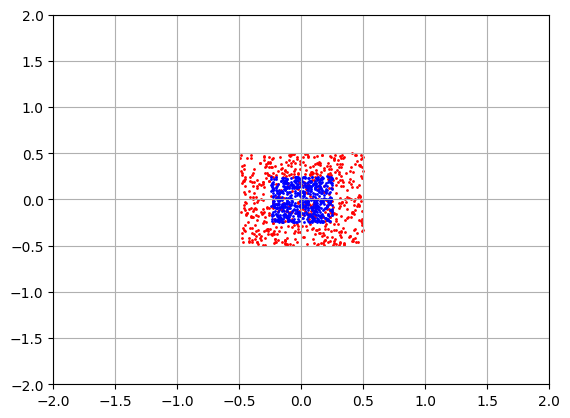

In [6]:

x = np.random.uniform(-0.5, 0.5, size=(2, 600))
x = np.vstack((x, np.ones(x.shape[1])))
T = np.array([[0.5, 0, 0], [0, 0.5, 0], [0, 0, 1]])
y = T @ x

plt.figure()
plt.scatter(x[0,:], x[1,:], s=1, c='r')
plt.scatter(y[0,:], y[1,:], s=1, c='b')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.grid()
plt.show()





# Exercício 3

* Peso: 3 pontos

Algumas carteiras de investimento deram os seguintes retornos:

* 100 ações da empresa E1 e 200 ações da E2 deram retorno de R$100,00,
* 1000 ações da empresa E1 e 2000 ações da E2 deram retorno de R$1000,00,
* 200 ações da empresa E2 e 300 da E3 deram retorno de R$500,00 
* 400 ações da empresa E2 e 600 da E3 deram retorno de R$1000,00 
* 1000 ações da empresa E1 e 100 da E3 deram retorno de R$1500,00
* 2000 ações da empresa E1 e 200 da E3 deram retorno de R$3000,00 

*Usando estritamente formulações matriciais*, responda:
1. Qual é o retorno por ação de cada empresa?
1. Qual é o retorno de uma carteira com 100 ações da empresa E1, 200 da empresa E2 e 300 da E3?

In [13]:
'''
Vamos pegar tres equações do enunciado

100 * E1 + 200 * E2 = 100
200 * E1 + 300 * E2 = 500
400 * E2 = 600 * E3 = 1000

sendo assim, temos que
E1 + 2 * E2 = 1
2 * E1 + 3 * E2 = 5
4 * E2 + 6 * E3 = 10

vamos transformar isso em matrizes
vamos chamar nossa matriz multiplicadora de M
Nossa matriz de entrada será X
Nossa matriz de saída será E
'''
M = np.array([[1, 2, 0], [2, 3, 0], [0, 4, 6]])
X = np.array([[1], [5], [10]])

# Sabemos que X = M @ E, portanto E = M^-1 @ X
E = np.linalg.inv(M) @ X

# resposta da questão 1 printando o retorno por ação de cada empresa
print(f"Retorno por ação de cada empresa: E1 = {E[0,0]}, E2 = {E[1,0]}, E3 = {E[2,0]}")

# questao 2
# agora queremos calcular X
M = np.array([[100, 200, 300]])
X = M @ E
print(f"Retorno de uma carteira com 100 ações da empresa E1, 200 da empresa E2 e 300 da E3: {X[0,0]}")

Retorno por ação de cada empresa: E1 = 7.0, E2 = -3.0, E3 = 3.6666666666666665
Retorno de uma carteira com 100 ações da empresa E1, 200 da empresa E2 e 300 da E3: 1200.0


### Justificativa

Vamos pegar tres equações do enunciado

$$100 * E_{1} + 200 * E_{2} = 100$$
$$200 * E_{1} + 300 * E_{2} = 500$$
$$400 * E_{2} = 600 * E_{3} = 1000$$

sendo assim, temos que
$$E_{1} + 2 * E_{2} = 1$$
$$2 * E_{1} + 3 * E_{2} = 5$$
$$4 * E_{2} + 6 * E_{3} = 10$$

vamos transformar isso em matrizes
vamos chamar nossa matriz multiplicadora de M
Nossa matriz de entrada será X
Nossa matriz de saída será E

$$
M =
\begin{bmatrix}
    1 & 2 & 0 \\
    2 & 3 & 0 \\
    0 & 4 & 6
\end{bmatrix}
$$

$$
X =
\begin{bmatrix}
    1 \\
    5 \\
    10
\end{bmatrix}
$$

Temos $X = ME$, portanto $E = M^{-1} X$

Agora temos que calcular a inversa de M, para isso, vamos usar a função inv do numpy

```python
E = np.linalg.inv(M) @ X
```

vamos responder a seguinte pergunta:
1. Qual é o retorno por ação de cada empresa? (E1, E2, E3)

Resposta: $E_{1} = 7.0, E_{2} = -3.0, E_{3} = 3.6666666666666665$

### Agora para a questao 2 temos outra matriz

Temos nosso M, e temos nosso E, precisamos agora calcular o X

nosso novo M eh:

$$
M =
\begin{bmatrix}
    100 & 200 & 300
\end{bmatrix}
$$

nosso novo X eh:

```python
X = M @ E
```

2. Qual é o retorno de uma carteira com 100 ações da empresa E1, 200 da empresa E2 e 300 da E3?

Resposta: Retorno de uma carteira com 100 ações da empresa $E_{1}$, 200 da empresa $E_{2}$ e 300 da $E_{3}$: R$1200.0

# Exercício 4

* Peso: 4 pontos

Uma maneira de fazer transformações em imagens é usar pontos de referência. Por exemplo, podemos definir pontos de referência em um rosto como o centro de cada um dos olhos, a ponta do nariz e o ponto inferior do queixo. Daí então, encontramos onde esses pontos estão na imagem de origem, e escolhemos (como quisermos) onde os pontos estão na imagem de destino. Encontramos a transformação linear que realiza esse mapeamento, e então aplicamos essa mesma transformação para todos os pontos da imagem, isto é:

$$
Xd = T X,
$$

onde $Xd$ é uma matriz com pontos na imagem de destino, $X$ é uma matriz com pontos na imagem de origem, e $T$ é uma transformação linear.

Num rosto, em uma imagem que está mapeada no plano cartesiano (isto é, no plano usual $x,y$ e não numa matriz de pixels), encontramos:

* O olho esquerdo em $(-2, 3)$,
* o olho direito em $(2, 3)$
* A ponta do nariz em $(0,0)$
* O ponto inferior do queixo em $(0, -3)$

O rosto foi mapeado usando uma transformação linear de forma que os pontos de referência foram deslocados para:

* O olho esquerdo em $(-6, 2)$,
* o olho direito em $(6, 1)$
* A ponta do nariz em $(3, 0)$

Usando formulações matriciais, responda: qual é a distância entre o ponto inferior do queixo e a ponta do nariz no novo mapeamento?


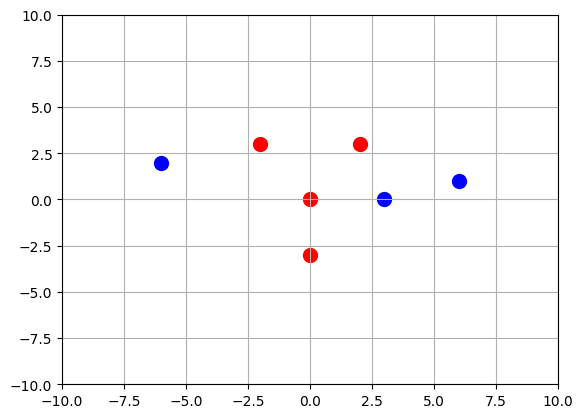

In [26]:
# vamos plotar os pontos de referência
plt.figure()
plt.scatter([-2, 2, 0, 0], [3, 3, 0, -3], s=100, c='r')
plt.scatter([-6, 6, 3], [2, 1, 0], s=100, c='b')
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.grid()
plt.show()


T = [[ 3.   -1.    3.  ]
 [-0.25  0.5   0.  ]
 [ 0.    0.    1.  ]]
O Queixo foi mapeado para 6.0, -1.5


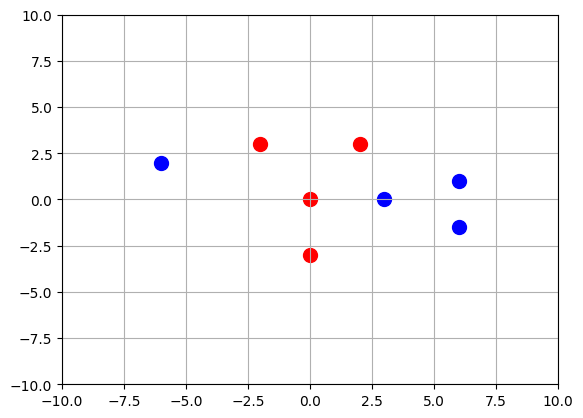

In [29]:
# Vamos agora usar multiplicação de matrizes para encontrar a distância entre o ponto inferior do queixo e a ponta do nariz no novo mapeamento
# vamos calcular a transformação linear
X = np.array([[-2, 2, 0], [3, 3, 0], [1, 1, 1]])
Xd = np.array([[-6, 6, 3], [2, 1, 0], [1, 1, 1]])
# Y = T @ X
T = Xd @ np.linalg.inv(X)
print(f"T = {T}")

# Vamos calcular para onde foi nosso queixo
# sabemos que o queixo está em (0, -3), portanto
Q = np.array([[0], [-3], [1]])
Q = T @ Q
print(f"O Queixo foi mapeado para {Q[0,0]}, {Q[1,0]}")

# Vamos fazer o grafico do nosso rosto e do novo rosto, agora com o queixo mapeado
plt.figure()
plt.scatter([-2, 2, 0, 0], [3, 3, 0, -3], s=100, c='r')
plt.scatter([-6, 6, 3, Q[0,0]], [2, 1, 0, Q[1,0]], s=100, c='b')
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.grid()
plt.show()


In [28]:
# Por fim, vamos calcular a distância entre o queixo e a ponta do nariz 
# sabemos que a ponta do nariz está em (3, 0), e o queixo está em (3, -3)
# portanto, a distância é
dist = np.sqrt((3 - Q[0,0])**2 + (0 - Q[1,0])**2)
print(f"A distância entre o queixo e a ponta do nariz é {dist}")

A distância entre o queixo e a ponta do nariz é 3.3541019662496847


### Justificativa

Não sabemos onde foi parar o queixo, mas sabemos que uma matriz T mutiplicou nossa matriz de pontos e com isso nosso rosto foi transformado, sendo assim, vamos calcular a matriz T

Para isso pegamos os pontos de referencia da imagem de origem e os pontos de referencia da imagem de destino

A matriz X sera nossa origem e nossa matriz Xd sera nossa destino

$$
X = 
\begin{bmatrix}
    -2 & 2 & 0 \\
    3 & 3 & 0 \\
    1 & 1 & 1
\end{bmatrix}
$$

$$
Xd =
\begin{bmatrix}
    -6 & 6 & 3 \\
    2 & 1 & 0 \\
    1 & 1 & 1
\end{bmatrix}
$$

Temos que: $$Xd = TX$$

Portanto temos que: $$T = X_{d} X^{-1}$$

```python
T = Xd @ np.linalg.inv(X)
```

Sendo assim, nossa matriz T eh: 

$$T = 
\begin{bmatrix}
    3 & -1 & 3 \\
    -0.25 & 0.5 & 0 \\
    0 & 0 & 1
\end{bmatrix}
$$

### Agora vamos calcular a distancia entre o queixo e o nariz

Vamos chamar de Q nosso queixo antigo e $N_{Q}$ nosso queixo novo

Temos que: $$N_{Q} = TQ$$

Nosso Q eh:
$$
Q =
\begin{bmatrix}
    0 \\
    -3 \\
    1
\end{bmatrix}
$$

Portanto podemos realizar a multiplicação de matrizes e obter nosso $N_{Q}$
```python
N_Q = T @ Q
```

Resultando eh:

$$
N_{Q} =
\begin{bmatrix}
    6 \\
    -1.5 \\
    1
\end{bmatrix}
$$

Agora vamos calcular a distancia entre o queixo e o nariz

Para isso vamos usar a formula da distancia entre dois pontos

Essa formula eh descrita por: $$d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}$$

Sendo assim, temos que:

$$d = \sqrt{(0 - 6)^2 + (-3 - (-1.5))^2}$$

```python
d = np.sqrt((0 - N_Q[0])**2 + (-3 - N_Q[1])**2)
```

Portanto, temos que: $d = 3.3541019662496847$

A distância entre o queixo e a ponta do nariz é 3.3541019662496847